In [19]:
from APES import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import pylab as pl
from IPython import display
import skvideo.io
# Set the dimension for each block ( affect the generated image quality)
Settings.SetBlockSize(100)

# Simple Example

In [22]:
x = time()
time()-x

5.555152893066406e-05

/home/aqeel/miniconda3/envs/Kgpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


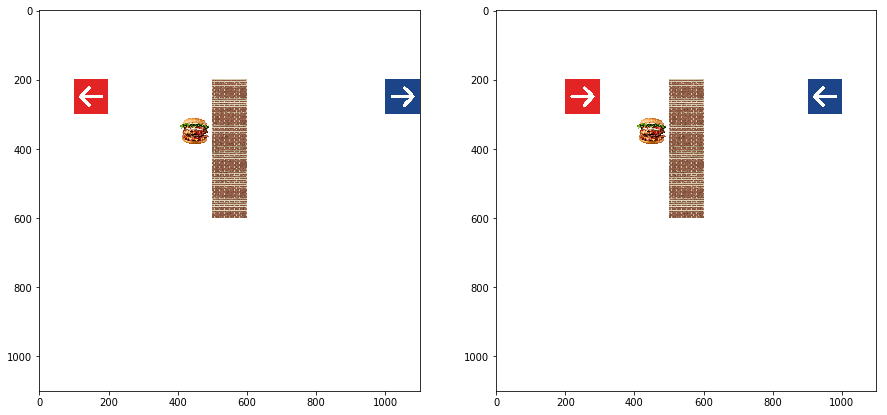

In [2]:
perf = {'sub':(2,1),'dom':(2,10),'food':(3,4),'obs':(3,5),'subdir':'W','domdir':'E','mesg':'example'}
game = CreateEnvironment(perf)

agents = [game.agents[i] for i in game.agents]

game.Step()
env_initial = game.BuildImage()

#Execute every time step
agents[0].NextAction = Settings.PossibleActions[2]
agents[1].NextAction = Settings.PossibleActions[3]

game.Step()
env_1step = game.BuildImage()

fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(env_initial)
ax[1].imshow(env_1step)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

# Complex Example.

/home/aqeel/miniconda3/envs/Kgpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


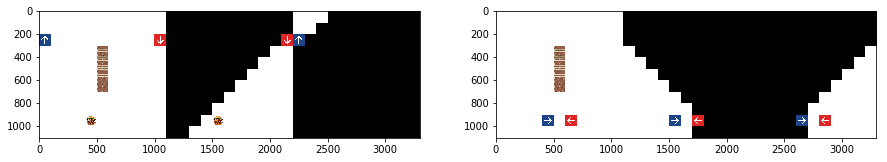

In [25]:
#Add pictures for items
Settings.AddImage('Wall','APES/Pics/wall.jpg')
Settings.AddImage('Food','APES/Pics/food.jpg')

#Create Probability distribution matrices (PDMs)
obs_pdm = np.zeros(Settings.WorldSize)
agnts_pdm = np.zeros(Settings.WorldSize)
food_pdm = np.zeros(Settings.WorldSize)

# Obstacles can appear from 3rd to 7th row and 5th column
obs_pdm[3:8,5] = 1 
agnts_pdm[2,[0,10]] = 1
food_pdm[:,4:7] = 1

#Add PDMs to Settings
Settings.AddProbabilityDistribution('Obs_pdm',obs_pdm) 
Settings.AddProbabilityDistribution('agnts_pdm',agnts_pdm)
Settings.AddProbabilityDistribution('food_pdm',food_pdm)

#Create World Elements
#Create vertical obastacle with length 4
obshape = np.ones((4,1))
obs = Obstacles('Wall',Shape=obshape,PdstName='Obs_pdm')

#Create two agents
ragnt = Agent(Fname='APES/Pics/red.jpg',PdstName='agnts_pdm')
bagnt = Agent(Fname='APES/Pics/blue.jpg',PdstName='agnts_pdm')
food = Foods('Food',PdstName='food_pdm')

#Reward food by 10, time step by -0.1
game = World(RewardsScheme=[0,10,-0.1])

#Adding Agents in Order of Following the action
game.AddAgents([ragnt,bagnt])
game.AddObstacles([obs])
game.AddFoods([food])

#Execute at the beginning of every episode
game.GenerateWorld()
game.Step()
env_initial = np.concatenate([game.BuildImage(),
                              game.AgentViewPoint(ragnt.ID),
                              game.AgentViewPoint(bagnt.ID)],axis=1)*255

writer = skvideo.io.FFmpegWriter("output.mp4")
writer.writeFrame(env_initial)

#Execute every time step
while not game.Terminated[0]:
    bagnt.DetectAndAstar()
    ragnt.DetectAndAstar()
    game.Step()
    env_1step = np.concatenate([game.BuildImage(),
                                game.AgentViewPoint(ragnt.ID),
                                game.AgentViewPoint(bagnt.ID)],axis=1)*255
    writer.writeFrame(env_1step)
writer.close()

fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(env_initial/255)
ax[1].imshow(env_1step/255)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()